In [35]:
import numpy as np
import pandas as pd
import scipy.stats as sc_st
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
player = "Roger Federer"
fname = "{name}.csv".format(name=player.replace(" ", "-"))
csv = pd.read_csv(fname)

In [37]:
total_points = csv['player1 total points total']
won_points = csv['player1 total points won'] / total_points
ace_points = csv['player1 aces'] / total_points

(0.0, 1.0)

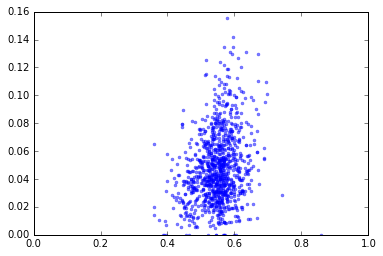

In [38]:
plt.plot(won_points, ace_points, ".", alpha=0.5)
plt.xlim(0., 1.0)

In [39]:
ace_won_df = pd.DataFrame({'points': won_points, 'aces': ace_points}).dropna()  # dropnaは値が入っていないセルを削除する
ace_won_df.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


In [40]:
ace_won_df.corr()

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


In [41]:
ace_won_df['result'] = ace_won_df['points'] > ace_won_df['points'].median()
ace_won_df['many aces'] = ace_won_df['aces'] > ace_won_df['aces'].median()

理論に基づく予測値を$$(\mu, \sigma)$$ とする．
実測値を
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$
とすると，Z検定は
$$z = \frac{\bar{x} - \mu}{\mathrm{std}(x)} = (\bar{x} - \mu)\sqrt{\frac{n}{\sigma}}$$
で求まるスコアzがz数表のどの辺りにいるかどうかで判定する．
z数表は累積分布関数(確率密度関数(正規分布)の積分)より求まる．

使う確率密度関数により名前が異なる
* Z検定: 正規分布
* t検定: t分布
* $\chi^2$検定: $\chi^2$分布

In [46]:
df_2x2 = pd.crosstab(ace_won_df['result'], ace_won_df['many aces'])
df_2x2

many aces,False,True
result,,
False,300,214
True,214,299


### 独立性検定

* 2つの変数に対する2つの観察（2x2分割表で表される）が互いに独立かどうかを検定する。
* カイ二乗の計算値は、確率分布が二項分布あるいは正規分布に従う集団に関しては正確にカイ二乗分布に従う。

chi2_contingency は以下を返す
1st: $\chi^2$ 値
2nd: p値(判定に使う)
3rd:次元

In [48]:
sc_st.chi2_contingency(df_2x2)

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))

以上より，p値が 1.3384233799633629e-07 < 1.00e-05であるため，99%以上の確率で相関はあると言える